# Code Block 1

In [1]:
############################ Load required libraries ############################
import torch
!pip install torchsummary
from torchsummary import summary
import matplotlib.pyplot as plt


#Load Model configuration
from models import Model
# Load necessary functions
from utils import  *



################################ Hyperparamters ################################




# variables to store data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Define hyperparameters
batch_size = 256          # Define the batch size for data loading
lr = 0.2                  # Define learning rate value
momentum = 0.9            # Define momentum value
step_size= 5              # Define stepsize value in scheduler
gamma=0.75                 # Define dacay value of learning rate in scheduler

criterion_name = "nll_loss"       # Define criterion name
num_epochs = 80                   # Number of epochs for training
optimizer_algo = "SGD"            # Define optimizer name
dropout_num = 0.05

# Create a dictionary of keyword arguments (kwargs) for DataLoader
kwargs = {
    'batch_size': batch_size,   # Set the batch size for each batch of data
    'shuffle': True,            # ensures that the model encounters a diverse mix of data during training, leading to better learning and generalization (during testing, the order of data doesn’t impact the model’s predictions)
    'num_workers': 4,           # Number of worker threads for data loading ( each worker will deal with batchsize/num_workers set of data under a batch) # parallel processing-> reduces overall time
    'pin_memory': True          # Enable pinning memory for faster GPU transfer
}


# Code Block 2

In [2]:
# check if CUDA is available or not
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")       #setting the device on which computations will be executed
print("Device set to: ",device)

CUDA Available? True
Device set to:  cuda


# Code Block 3

In [3]:
## Get CIFAR dataset and pass it to loader

_ ,test_loader            = get_CIFARdataset_with_loader('test',kwargs)   # load test data
label_, train_loader      = get_CIFARdataset_with_loader('train',kwargs)  # load train data
print()

label_map = {v: k for k, v in label_.items()}
label_map

100%|██████████| 170498071/170498071 [00:05<00:00, 29627848.44it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Testing data loaded successfully. Shape of data:  (10000, 32, 32, 3)
Files already downloaded and verified
Training data loaded successfully. Shape of data:  (50000, 32, 32, 3)



{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

# Code Block 4

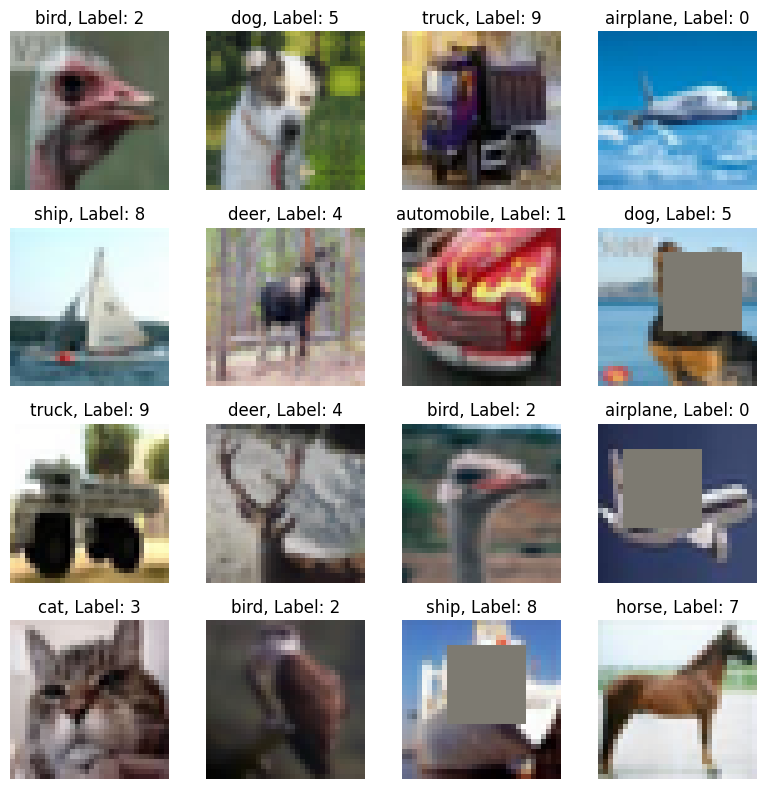

In [4]:
################ Display a sample of data from the training dataset #####################
post_display(train_loader,label_map)

# Code Block 5

In [5]:
# For reproducibility
SEED = 4
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# Initialize the model and move it to the device ( GPU )
model = Model(dropout_value = dropout_num).to(device)

#Get summary of model
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
              ReLU-6           [-1, 32, 30, 30]               0
       BatchNorm2d-7           [-1, 32, 30, 30]              64
           Dropout-8           [-1, 32, 30, 30]               0
            Conv2d-9           [-1, 48, 26, 26]          13,824
             ReLU-10           [-1, 48, 26, 26]               0
      BatchNorm2d-11           [-1, 48, 26, 26]              96
          Dropout-12           [-1, 48, 26, 26]               0
           Conv2d-13           [-1, 32, 13, 13]          13,824
             ReLU-14           [-1, 32,

# Code Block 6

In [6]:
####################################################### Train Model#####################################################

# Set up the optimizer with stochastic gradient descent with learning rate and momentum
optimizer = get_optimizer(model,optimizer_algo, lr, momentum)

# Configure a learning rate scheduler that decays the learning rate by a factor of 0.1 every 15 epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

# Define the loss function as negative log likelihood loss.
criterion = get_loss(criterion_name)


print(f"The current learning rate is: {[round(lr,2)]}")
# Loop over the dataset multiple times, once for each epoch
for epoch in range(1, num_epochs+1):
    # Print the current epoch number
    print(f'Epoch {epoch}')

    # Call the train function, passing in the model, device, data loader, optimizer, and loss function
    train(model, device, train_loader, optimizer, criterion,train_losses,train_acc)

    # After training, evaluate the model on the same training data loader (should be test_loader for evaluation)
    misclassified_samples = test(model, device, test_loader, criterion,test_losses,test_acc)

    scheduler.step()   #update the lr
    current_lr = scheduler.get_last_lr()  # Get the latest learning rate
    print(f"The current learning rate is: {[round(current_lr[0],2)]}")


The current learning rate is: [0.2]
Epoch 1


Train: Loss=1.6094 Batch_id=195 Accuracy=34.81: 100%|██████████| 196/196 [00:04<00:00, 39.71it/s]


Test set: Average loss: 0.0060, Accuracy: 4366/10000 (43.66%)

The current learning rate is: [0.2]
Epoch 2


Train: Loss=1.4988 Batch_id=195 Accuracy=45.33: 100%|██████████| 196/196 [00:04<00:00, 43.00it/s]


Test set: Average loss: 0.0055, Accuracy: 5048/10000 (50.48%)

The current learning rate is: [0.2]
Epoch 3


Train: Loss=1.2969 Batch_id=195 Accuracy=50.71: 100%|██████████| 196/196 [00:04<00:00, 46.70it/s]


Test set: Average loss: 0.0049, Accuracy: 5639/10000 (56.39%)

The current learning rate is: [0.2]
Epoch 4


Train: Loss=1.0372 Batch_id=195 Accuracy=55.18: 100%|██████████| 196/196 [00:04<00:00, 47.59it/s]


Test set: Average loss: 0.0046, Accuracy: 5846/10000 (58.46%)

The current learning rate is: [0.2]
Epoch 5


Train: Loss=1.3092 Batch_id=195 Accuracy=57.96: 100%|██████████| 196/196 [00:04<00:00, 45.90it/s]


Test set: Average loss: 0.0042, Accuracy: 6328/10000 (63.28%)

The current learning rate is: [0.15]
Epoch 6


Train: Loss=1.1212 Batch_id=195 Accuracy=62.33: 100%|██████████| 196/196 [00:04<00:00, 46.71it/s]


Test set: Average loss: 0.0037, Accuracy: 6721/10000 (67.21%)

The current learning rate is: [0.15]
Epoch 7


Train: Loss=1.1056 Batch_id=195 Accuracy=64.21: 100%|██████████| 196/196 [00:04<00:00, 46.13it/s]


Test set: Average loss: 0.0036, Accuracy: 6823/10000 (68.23%)

The current learning rate is: [0.15]
Epoch 8


Train: Loss=1.1883 Batch_id=195 Accuracy=65.51: 100%|██████████| 196/196 [00:04<00:00, 47.99it/s]


Test set: Average loss: 0.0034, Accuracy: 7004/10000 (70.04%)

The current learning rate is: [0.15]
Epoch 9


Train: Loss=0.9512 Batch_id=195 Accuracy=66.98: 100%|██████████| 196/196 [00:04<00:00, 47.37it/s]


Test set: Average loss: 0.0033, Accuracy: 7106/10000 (71.06%)

The current learning rate is: [0.15]
Epoch 10


Train: Loss=0.7195 Batch_id=195 Accuracy=68.29: 100%|██████████| 196/196 [00:04<00:00, 45.61it/s]


Test set: Average loss: 0.0032, Accuracy: 7179/10000 (71.79%)

The current learning rate is: [0.11]
Epoch 11


Train: Loss=0.7038 Batch_id=195 Accuracy=70.21: 100%|██████████| 196/196 [00:04<00:00, 48.09it/s]


Test set: Average loss: 0.0030, Accuracy: 7385/10000 (73.85%)

The current learning rate is: [0.11]
Epoch 12


Train: Loss=0.8311 Batch_id=195 Accuracy=71.37: 100%|██████████| 196/196 [00:04<00:00, 45.26it/s]


Test set: Average loss: 0.0029, Accuracy: 7479/10000 (74.79%)

The current learning rate is: [0.11]
Epoch 13


Train: Loss=0.9729 Batch_id=195 Accuracy=72.08: 100%|██████████| 196/196 [00:04<00:00, 45.12it/s]


Test set: Average loss: 0.0029, Accuracy: 7383/10000 (73.83%)

The current learning rate is: [0.11]
Epoch 14


Train: Loss=0.9824 Batch_id=195 Accuracy=72.27: 100%|██████████| 196/196 [00:04<00:00, 46.34it/s]


Test set: Average loss: 0.0027, Accuracy: 7640/10000 (76.40%)

The current learning rate is: [0.11]
Epoch 15


Train: Loss=0.7223 Batch_id=195 Accuracy=73.22: 100%|██████████| 196/196 [00:04<00:00, 45.40it/s]


Test set: Average loss: 0.0026, Accuracy: 7710/10000 (77.10%)

The current learning rate is: [0.08]
Epoch 16


Train: Loss=0.6339 Batch_id=195 Accuracy=74.68: 100%|██████████| 196/196 [00:04<00:00, 47.74it/s]


Test set: Average loss: 0.0025, Accuracy: 7783/10000 (77.83%)

The current learning rate is: [0.08]
Epoch 17


Train: Loss=0.6668 Batch_id=195 Accuracy=75.68: 100%|██████████| 196/196 [00:04<00:00, 45.55it/s]


Test set: Average loss: 0.0025, Accuracy: 7790/10000 (77.90%)

The current learning rate is: [0.08]
Epoch 18


Train: Loss=0.7147 Batch_id=195 Accuracy=75.76: 100%|██████████| 196/196 [00:04<00:00, 46.83it/s]


Test set: Average loss: 0.0025, Accuracy: 7796/10000 (77.96%)

The current learning rate is: [0.08]
Epoch 19


Train: Loss=0.4908 Batch_id=195 Accuracy=76.22: 100%|██████████| 196/196 [00:04<00:00, 46.10it/s]


Test set: Average loss: 0.0024, Accuracy: 7909/10000 (79.09%)

The current learning rate is: [0.08]
Epoch 20


Train: Loss=0.6460 Batch_id=195 Accuracy=76.39: 100%|██████████| 196/196 [00:04<00:00, 46.32it/s]


Test set: Average loss: 0.0024, Accuracy: 7909/10000 (79.09%)

The current learning rate is: [0.06]
Epoch 21


Train: Loss=0.5691 Batch_id=195 Accuracy=77.33: 100%|██████████| 196/196 [00:04<00:00, 47.04it/s]


Test set: Average loss: 0.0023, Accuracy: 7963/10000 (79.63%)

The current learning rate is: [0.06]
Epoch 22


Train: Loss=0.8380 Batch_id=195 Accuracy=77.83: 100%|██████████| 196/196 [00:04<00:00, 45.27it/s]


Test set: Average loss: 0.0023, Accuracy: 7993/10000 (79.93%)

The current learning rate is: [0.06]
Epoch 23


Train: Loss=0.7186 Batch_id=195 Accuracy=78.17: 100%|██████████| 196/196 [00:04<00:00, 48.13it/s]


Test set: Average loss: 0.0023, Accuracy: 8010/10000 (80.10%)

The current learning rate is: [0.06]
Epoch 24


Train: Loss=0.5910 Batch_id=195 Accuracy=78.43: 100%|██████████| 196/196 [00:04<00:00, 46.38it/s]


Test set: Average loss: 0.0022, Accuracy: 8050/10000 (80.50%)

The current learning rate is: [0.06]
Epoch 25


Train: Loss=0.6938 Batch_id=195 Accuracy=78.68: 100%|██████████| 196/196 [00:04<00:00, 46.84it/s]


Test set: Average loss: 0.0022, Accuracy: 8072/10000 (80.72%)

The current learning rate is: [0.05]
Epoch 26


Train: Loss=0.5759 Batch_id=195 Accuracy=79.27: 100%|██████████| 196/196 [00:04<00:00, 47.23it/s]


Test set: Average loss: 0.0021, Accuracy: 8148/10000 (81.48%)

The current learning rate is: [0.05]
Epoch 27


Train: Loss=0.7043 Batch_id=195 Accuracy=79.63: 100%|██████████| 196/196 [00:04<00:00, 45.75it/s]


Test set: Average loss: 0.0022, Accuracy: 8133/10000 (81.33%)

The current learning rate is: [0.05]
Epoch 28


Train: Loss=0.6519 Batch_id=195 Accuracy=80.00: 100%|██████████| 196/196 [00:04<00:00, 47.73it/s]


Test set: Average loss: 0.0020, Accuracy: 8184/10000 (81.84%)

The current learning rate is: [0.05]
Epoch 29


Train: Loss=0.5836 Batch_id=195 Accuracy=80.13: 100%|██████████| 196/196 [00:04<00:00, 46.20it/s]


Test set: Average loss: 0.0021, Accuracy: 8172/10000 (81.72%)

The current learning rate is: [0.05]
Epoch 30


Train: Loss=0.5855 Batch_id=195 Accuracy=79.98: 100%|██████████| 196/196 [00:04<00:00, 45.90it/s]


Test set: Average loss: 0.0021, Accuracy: 8163/10000 (81.63%)

The current learning rate is: [0.04]
Epoch 31


Train: Loss=0.6475 Batch_id=195 Accuracy=80.99: 100%|██████████| 196/196 [00:04<00:00, 47.29it/s]


Test set: Average loss: 0.0020, Accuracy: 8180/10000 (81.80%)

The current learning rate is: [0.04]
Epoch 32


Train: Loss=0.5286 Batch_id=195 Accuracy=81.01: 100%|██████████| 196/196 [00:04<00:00, 46.29it/s]


Test set: Average loss: 0.0021, Accuracy: 8216/10000 (82.16%)

The current learning rate is: [0.04]
Epoch 33


Train: Loss=0.5246 Batch_id=195 Accuracy=81.06: 100%|██████████| 196/196 [00:04<00:00, 48.31it/s]


Test set: Average loss: 0.0020, Accuracy: 8234/10000 (82.34%)

The current learning rate is: [0.04]
Epoch 34


Train: Loss=0.6944 Batch_id=195 Accuracy=81.53: 100%|██████████| 196/196 [00:04<00:00, 46.03it/s]


Test set: Average loss: 0.0020, Accuracy: 8287/10000 (82.87%)

The current learning rate is: [0.04]
Epoch 35


Train: Loss=0.5533 Batch_id=195 Accuracy=81.53: 100%|██████████| 196/196 [00:04<00:00, 48.13it/s]


Test set: Average loss: 0.0021, Accuracy: 8232/10000 (82.32%)

The current learning rate is: [0.03]
Epoch 36


Train: Loss=0.4348 Batch_id=195 Accuracy=81.73: 100%|██████████| 196/196 [00:04<00:00, 47.16it/s]


Test set: Average loss: 0.0020, Accuracy: 8288/10000 (82.88%)

The current learning rate is: [0.03]
Epoch 37


Train: Loss=0.4525 Batch_id=195 Accuracy=82.01: 100%|██████████| 196/196 [00:04<00:00, 47.14it/s]


Test set: Average loss: 0.0020, Accuracy: 8288/10000 (82.88%)

The current learning rate is: [0.03]
Epoch 38


Train: Loss=0.5803 Batch_id=195 Accuracy=82.20: 100%|██████████| 196/196 [00:04<00:00, 48.20it/s]


Test set: Average loss: 0.0021, Accuracy: 8256/10000 (82.56%)

The current learning rate is: [0.03]
Epoch 39


Train: Loss=0.3751 Batch_id=195 Accuracy=82.38: 100%|██████████| 196/196 [00:04<00:00, 45.82it/s]


Test set: Average loss: 0.0020, Accuracy: 8323/10000 (83.23%)

The current learning rate is: [0.03]
Epoch 40


Train: Loss=0.4192 Batch_id=195 Accuracy=82.51: 100%|██████████| 196/196 [00:04<00:00, 47.87it/s]


Test set: Average loss: 0.0020, Accuracy: 8322/10000 (83.22%)

The current learning rate is: [0.02]
Epoch 41


Train: Loss=0.5352 Batch_id=195 Accuracy=82.48: 100%|██████████| 196/196 [00:04<00:00, 45.67it/s]


Test set: Average loss: 0.0020, Accuracy: 8319/10000 (83.19%)

The current learning rate is: [0.02]
Epoch 42


Train: Loss=0.2405 Batch_id=195 Accuracy=82.77: 100%|██████████| 196/196 [00:04<00:00, 47.59it/s]


Test set: Average loss: 0.0020, Accuracy: 8325/10000 (83.25%)

The current learning rate is: [0.02]
Epoch 43


Train: Loss=0.6946 Batch_id=195 Accuracy=83.07: 100%|██████████| 196/196 [00:04<00:00, 48.14it/s]


Test set: Average loss: 0.0020, Accuracy: 8337/10000 (83.37%)

The current learning rate is: [0.02]
Epoch 44


Train: Loss=0.5618 Batch_id=195 Accuracy=83.08: 100%|██████████| 196/196 [00:04<00:00, 46.60it/s]


Test set: Average loss: 0.0020, Accuracy: 8351/10000 (83.51%)

The current learning rate is: [0.02]
Epoch 45


Train: Loss=0.3447 Batch_id=195 Accuracy=83.35: 100%|██████████| 196/196 [00:04<00:00, 47.27it/s]


Test set: Average loss: 0.0019, Accuracy: 8354/10000 (83.54%)

The current learning rate is: [0.02]
Epoch 46


Train: Loss=0.4639 Batch_id=195 Accuracy=83.40: 100%|██████████| 196/196 [00:04<00:00, 44.72it/s]


Test set: Average loss: 0.0019, Accuracy: 8367/10000 (83.67%)

The current learning rate is: [0.02]
Epoch 47


Train: Loss=0.4311 Batch_id=195 Accuracy=83.61: 100%|██████████| 196/196 [00:04<00:00, 46.02it/s]


Test set: Average loss: 0.0019, Accuracy: 8371/10000 (83.71%)

The current learning rate is: [0.02]
Epoch 48


Train: Loss=0.4676 Batch_id=195 Accuracy=83.75: 100%|██████████| 196/196 [00:04<00:00, 46.29it/s]


Test set: Average loss: 0.0019, Accuracy: 8379/10000 (83.79%)

The current learning rate is: [0.02]
Epoch 49


Train: Loss=0.4282 Batch_id=195 Accuracy=83.95: 100%|██████████| 196/196 [00:04<00:00, 46.46it/s]


Test set: Average loss: 0.0019, Accuracy: 8352/10000 (83.52%)

The current learning rate is: [0.02]
Epoch 50


Train: Loss=0.6603 Batch_id=195 Accuracy=83.59: 100%|██████████| 196/196 [00:04<00:00, 48.02it/s]


Test set: Average loss: 0.0020, Accuracy: 8381/10000 (83.81%)

The current learning rate is: [0.01]
Epoch 51


Train: Loss=0.4440 Batch_id=195 Accuracy=83.96: 100%|██████████| 196/196 [00:04<00:00, 46.45it/s]


Test set: Average loss: 0.0019, Accuracy: 8405/10000 (84.05%)

The current learning rate is: [0.01]
Epoch 52


Train: Loss=0.6869 Batch_id=195 Accuracy=83.82: 100%|██████████| 196/196 [00:04<00:00, 47.11it/s]


Test set: Average loss: 0.0019, Accuracy: 8406/10000 (84.06%)

The current learning rate is: [0.01]
Epoch 53


Train: Loss=0.4787 Batch_id=195 Accuracy=84.11: 100%|██████████| 196/196 [00:04<00:00, 46.34it/s]


Test set: Average loss: 0.0019, Accuracy: 8403/10000 (84.03%)

The current learning rate is: [0.01]
Epoch 54


Train: Loss=0.2704 Batch_id=195 Accuracy=84.27: 100%|██████████| 196/196 [00:04<00:00, 46.63it/s]


Test set: Average loss: 0.0019, Accuracy: 8433/10000 (84.33%)

The current learning rate is: [0.01]
Epoch 55


Train: Loss=0.3194 Batch_id=195 Accuracy=84.15: 100%|██████████| 196/196 [00:04<00:00, 46.77it/s]


Test set: Average loss: 0.0019, Accuracy: 8389/10000 (83.89%)

The current learning rate is: [0.01]
Epoch 56


Train: Loss=0.3894 Batch_id=195 Accuracy=84.20: 100%|██████████| 196/196 [00:04<00:00, 45.68it/s]


Test set: Average loss: 0.0019, Accuracy: 8425/10000 (84.25%)

The current learning rate is: [0.01]
Epoch 57


Train: Loss=0.5191 Batch_id=195 Accuracy=84.56: 100%|██████████| 196/196 [00:04<00:00, 46.65it/s]


Test set: Average loss: 0.0019, Accuracy: 8408/10000 (84.08%)

The current learning rate is: [0.01]
Epoch 58


Train: Loss=0.3856 Batch_id=195 Accuracy=84.40: 100%|██████████| 196/196 [00:04<00:00, 46.32it/s]


Test set: Average loss: 0.0019, Accuracy: 8427/10000 (84.27%)

The current learning rate is: [0.01]
Epoch 59


Train: Loss=0.2849 Batch_id=195 Accuracy=84.50: 100%|██████████| 196/196 [00:04<00:00, 46.43it/s]


Test set: Average loss: 0.0019, Accuracy: 8446/10000 (84.46%)

The current learning rate is: [0.01]
Epoch 60


Train: Loss=0.4560 Batch_id=195 Accuracy=84.56: 100%|██████████| 196/196 [00:04<00:00, 47.14it/s]


Test set: Average loss: 0.0019, Accuracy: 8420/10000 (84.20%)

The current learning rate is: [0.01]
Epoch 61


Train: Loss=0.6739 Batch_id=195 Accuracy=84.80: 100%|██████████| 196/196 [00:04<00:00, 47.03it/s]


Test set: Average loss: 0.0019, Accuracy: 8422/10000 (84.22%)

The current learning rate is: [0.01]
Epoch 62


Train: Loss=0.4392 Batch_id=195 Accuracy=84.64: 100%|██████████| 196/196 [00:04<00:00, 47.06it/s]


Test set: Average loss: 0.0019, Accuracy: 8448/10000 (84.48%)

The current learning rate is: [0.01]
Epoch 63


Train: Loss=0.5522 Batch_id=195 Accuracy=84.63: 100%|██████████| 196/196 [00:04<00:00, 44.85it/s]


Test set: Average loss: 0.0019, Accuracy: 8436/10000 (84.36%)

The current learning rate is: [0.01]
Epoch 64


Train: Loss=0.4467 Batch_id=195 Accuracy=84.68: 100%|██████████| 196/196 [00:04<00:00, 46.31it/s]


Test set: Average loss: 0.0020, Accuracy: 8456/10000 (84.56%)

The current learning rate is: [0.01]
Epoch 65


Train: Loss=0.5645 Batch_id=195 Accuracy=84.52: 100%|██████████| 196/196 [00:04<00:00, 45.75it/s]


Test set: Average loss: 0.0019, Accuracy: 8445/10000 (84.45%)

The current learning rate is: [0.0]
Epoch 66


Train: Loss=0.4054 Batch_id=195 Accuracy=84.89: 100%|██████████| 196/196 [00:04<00:00, 47.51it/s]


Test set: Average loss: 0.0019, Accuracy: 8447/10000 (84.47%)

The current learning rate is: [0.0]
Epoch 67


Train: Loss=0.4485 Batch_id=195 Accuracy=84.91: 100%|██████████| 196/196 [00:04<00:00, 47.57it/s]


Test set: Average loss: 0.0019, Accuracy: 8460/10000 (84.60%)

The current learning rate is: [0.0]
Epoch 68


Train: Loss=0.3299 Batch_id=195 Accuracy=84.91: 100%|██████████| 196/196 [00:04<00:00, 46.05it/s]


Test set: Average loss: 0.0019, Accuracy: 8431/10000 (84.31%)

The current learning rate is: [0.0]
Epoch 69


Train: Loss=0.4229 Batch_id=195 Accuracy=84.82: 100%|██████████| 196/196 [00:04<00:00, 47.99it/s]


Test set: Average loss: 0.0018, Accuracy: 8444/10000 (84.44%)

The current learning rate is: [0.0]
Epoch 70


Train: Loss=0.5376 Batch_id=195 Accuracy=85.01: 100%|██████████| 196/196 [00:04<00:00, 46.86it/s]


Test set: Average loss: 0.0018, Accuracy: 8455/10000 (84.55%)

The current learning rate is: [0.0]
Epoch 71


Train: Loss=0.3528 Batch_id=195 Accuracy=84.93: 100%|██████████| 196/196 [00:04<00:00, 47.11it/s]


Test set: Average loss: 0.0018, Accuracy: 8446/10000 (84.46%)

The current learning rate is: [0.0]
Epoch 72


Train: Loss=0.4746 Batch_id=195 Accuracy=84.91: 100%|██████████| 196/196 [00:04<00:00, 47.24it/s]


Test set: Average loss: 0.0019, Accuracy: 8430/10000 (84.30%)

The current learning rate is: [0.0]
Epoch 73


Train: Loss=0.4993 Batch_id=195 Accuracy=85.41: 100%|██████████| 196/196 [00:04<00:00, 47.57it/s]


Test set: Average loss: 0.0019, Accuracy: 8458/10000 (84.58%)

The current learning rate is: [0.0]
Epoch 74


Train: Loss=0.4294 Batch_id=195 Accuracy=84.85: 100%|██████████| 196/196 [00:04<00:00, 47.53it/s]


Test set: Average loss: 0.0018, Accuracy: 8474/10000 (84.74%)

The current learning rate is: [0.0]
Epoch 75


Train: Loss=0.4569 Batch_id=195 Accuracy=84.92: 100%|██████████| 196/196 [00:04<00:00, 46.88it/s]


Test set: Average loss: 0.0019, Accuracy: 8454/10000 (84.54%)

The current learning rate is: [0.0]
Epoch 76


Train: Loss=0.5524 Batch_id=195 Accuracy=85.16: 100%|██████████| 196/196 [00:04<00:00, 47.99it/s]


Test set: Average loss: 0.0019, Accuracy: 8447/10000 (84.47%)

The current learning rate is: [0.0]
Epoch 77


Train: Loss=0.3558 Batch_id=195 Accuracy=85.17: 100%|██████████| 196/196 [00:04<00:00, 46.38it/s]


Test set: Average loss: 0.0019, Accuracy: 8458/10000 (84.58%)

The current learning rate is: [0.0]
Epoch 78


Train: Loss=0.4755 Batch_id=195 Accuracy=85.06: 100%|██████████| 196/196 [00:04<00:00, 47.37it/s]


Test set: Average loss: 0.0018, Accuracy: 8450/10000 (84.50%)

The current learning rate is: [0.0]
Epoch 79


Train: Loss=0.4428 Batch_id=195 Accuracy=85.22: 100%|██████████| 196/196 [00:04<00:00, 47.61it/s]


Test set: Average loss: 0.0019, Accuracy: 8442/10000 (84.42%)

The current learning rate is: [0.0]
Epoch 80


Train: Loss=0.3016 Batch_id=195 Accuracy=85.39: 100%|██████████| 196/196 [00:04<00:00, 44.86it/s]


Test set: Average loss: 0.0019, Accuracy: 8459/10000 (84.59%)

The current learning rate is: [0.0]


# Code Block 7

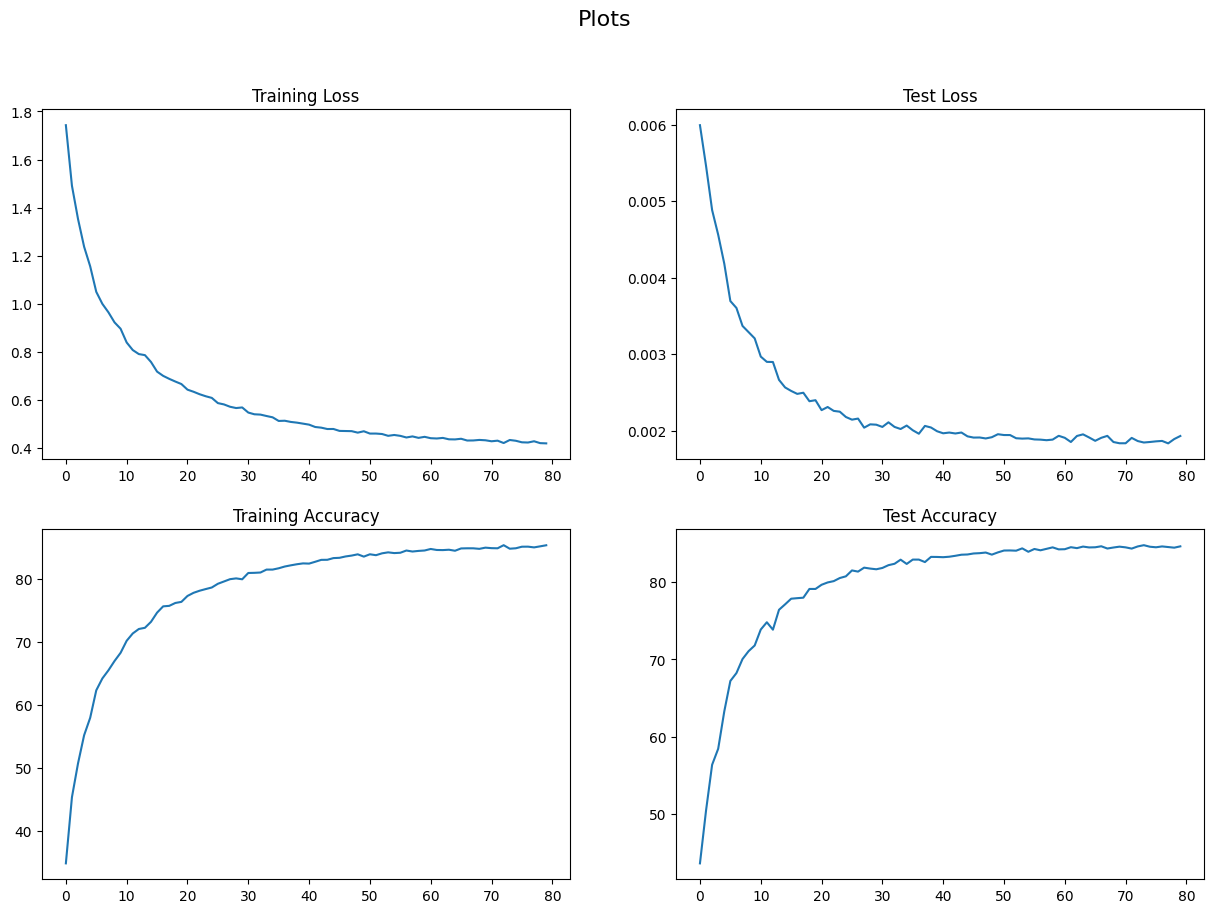

In [7]:
post_accuracyplots(train_losses,test_losses,train_acc,test_acc)